% https://github.com/bhattbhavesh91/bias_variance_example
% https://github.com/ayushsharma-crypto/Bias-Variance-Tradeoff/blob/main/code.ipynb

# Bias Variance Tradeoff

Prove that $MSE = \text{Bias} + \sigma^2 + \text{Var}^2$

In [2]:
import numpy as np

In [25]:
def mse(Y_true,Y_pred):
    # Y_true and Y_pred are array of length n
    return np.square(np.subtract(Y_true,Y_pred)).mean()

def rmse(mse):
    return np.sqrt(mse)

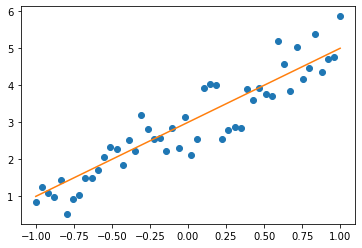

In [4]:
np.random.seed(15)  # from reproducibility purpose
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

def random_line(m, b, sigma, size=10):
    xdata = np.linspace(-1.0,1.0,size)
    # Generate normally distributed random error ~ N(0, sigma**2)
    errors = scipy.stats.norm.rvs(loc=0, scale=sigma, size=size)
    ydata = m * xdata + b + errors
    return xdata, ydata

xs, ys = random_line(m=2, b=3, sigma=0.5, size=50)

# Plot to see how closely the values fit the 
#   original line
fig, ax = plt.subplots()
ax.plot(xs, ys, 'o')
ax.plot(xs, 2 * xs + 3)

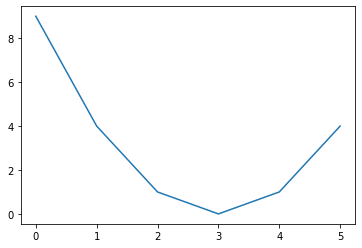

In [5]:
size = 50
xdata = np.linspace(-1.0,1.0,size)
errors = []
xs, ys = random_line(m=2, b=3, sigma=0.5, size=50)
for i in range(6):
    ydata = xdata * 2 + i
    err = mse(2*xdata + 3, ydata)
    errors.append(err)

plt.plot(errors)


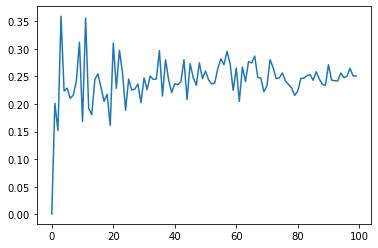

In [8]:
errors_var = []
np.random.seed(4) 
for s in range(1, 500, 5):
    xs, ys = random_line(m=2, b=3, sigma=0.5, size=s)
    err = mse(2*xs+3, ys)
    errors_var.append(err)

plt.plot(errors_var)

In [22]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split
rcParams['figure.figsize'] = 8, 6

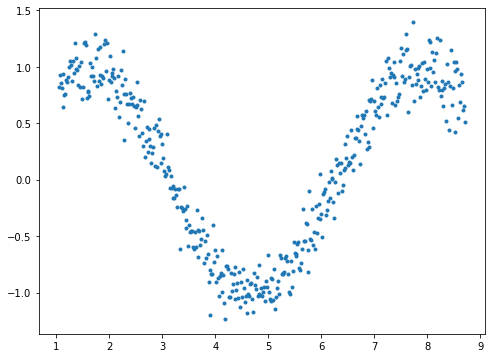

In [110]:
np.random.seed(15)
x = np.array([i*np.pi/180 for i in range(60,500,1)])
y = np.sin(x) + np.random.normal(0,0.15,len(x))
curve = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(curve['x'],curve['y'],'.')

In [111]:
def fit_poly( degree ):
    p = np.polyfit( curve.x, curve.y, deg = degree )
    curve['fit'] = np.polyval( p, curve.x )
    sn.regplot( curve.x, curve.y, fit_reg = False )
    return plt.plot( curve.x, curve.fit, label='fit' )

c:\Users\PeterNg\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
c:\Users\PeterNg\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


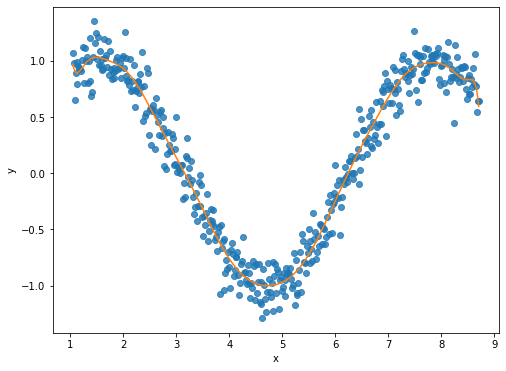

In [95]:
# fit_poly(1);
# fit_poly(2);
# fit_poly(3);

fit_poly(20);

In [112]:
train_X, test_X, train_y, test_y = train_test_split( curve.x,
                                                  curve.y,
                                                  test_size = 0.40,
                                                  random_state = 100 )

In [113]:
rmse_df = pd.DataFrame( columns = ["degree", "rmse_train", "rmse_test"] )

for i in range( 1,300 ):
    p = np.polyfit( train_X, train_y, deg = i )
    rmse_df.loc[i-1] = [ i,
                      rmse( mse(train_y, np.polyval( p, train_X )) ),
                      rmse( mse(test_y, np.polyval( p, test_X ) )) ]

c:\Users\PeterNg\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\PeterNg\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\PeterNg\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\PeterNg\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\PeterNg\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Us

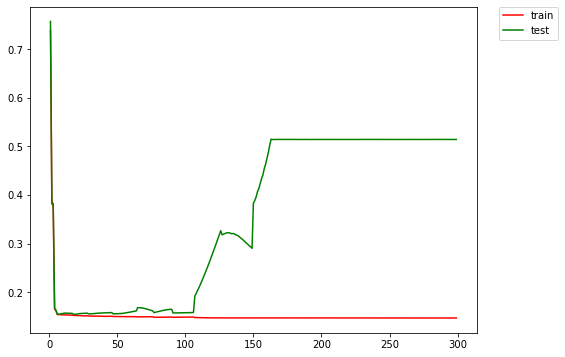

In [114]:
plt.plot( rmse_df.degree,
       rmse_df.rmse_train,
       label='train',
       color = 'r' )

plt.plot( rmse_df.degree,
       rmse_df.rmse_test,
       label='test',
       color = 'g' )

plt.legend(bbox_to_anchor=(1.05, 1),
         loc=2,
         borderaxespad=0.)